In [1]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

<ipython-input-1-c8dcee756ab9>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
rose_df = pd.read_csv("Rose.csv", parse_dates = True, index_col = 'YearMonth')
rose_df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [3]:
rose_df.tail()

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [4]:
rose_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [5]:
rose_df.duplicated().sum()

90

In [6]:
rose_df.isnull().sum()

Rose    2
dtype: int64

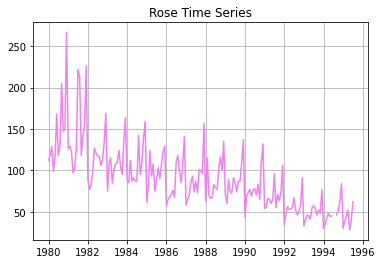

In [7]:
from pylab import rcParams
plt.title('Rose Time Series');
rcParams['figure.figsize'] = 10, 10
plt.grid();
plt.plot(rose_df, color='violet');


In [8]:
rose_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rose,185.0,90.394595,39.175344,28.0,63.0,86.0,112.0,267.0


In [9]:
rose_df[rose_df['Rose'].isna()]

,Rose
YearMonth,
1994-07-01,NaN
1994-08-01,NaN


In [10]:
print(rose_df.mode())
print(rose_df.mean())

   Rose
0  87.0
Rose    90.394595
dtype: float64


In [11]:
temp=rose_df.interpolate().round()
temp.isna().sum()

Rose    0
dtype: int64

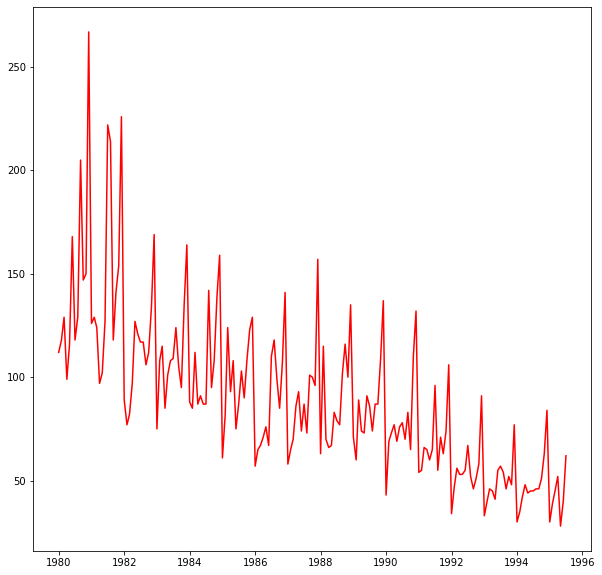

In [12]:
plt.plot(temp, color='red');

In [13]:
rose_df=temp

# Univariate

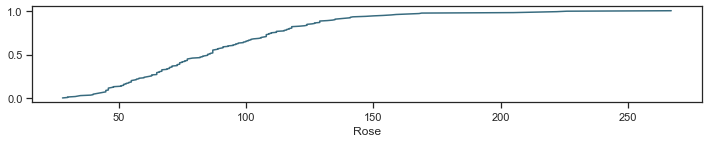

In [14]:
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

  
plt.subplot(312)
cdf = ECDF(rose_df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Rose');

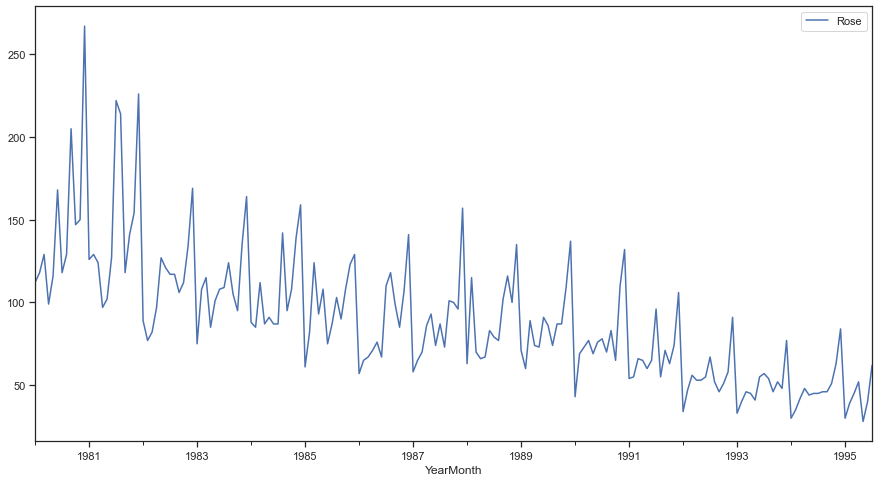

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
rose_df.plot()
plt.show()


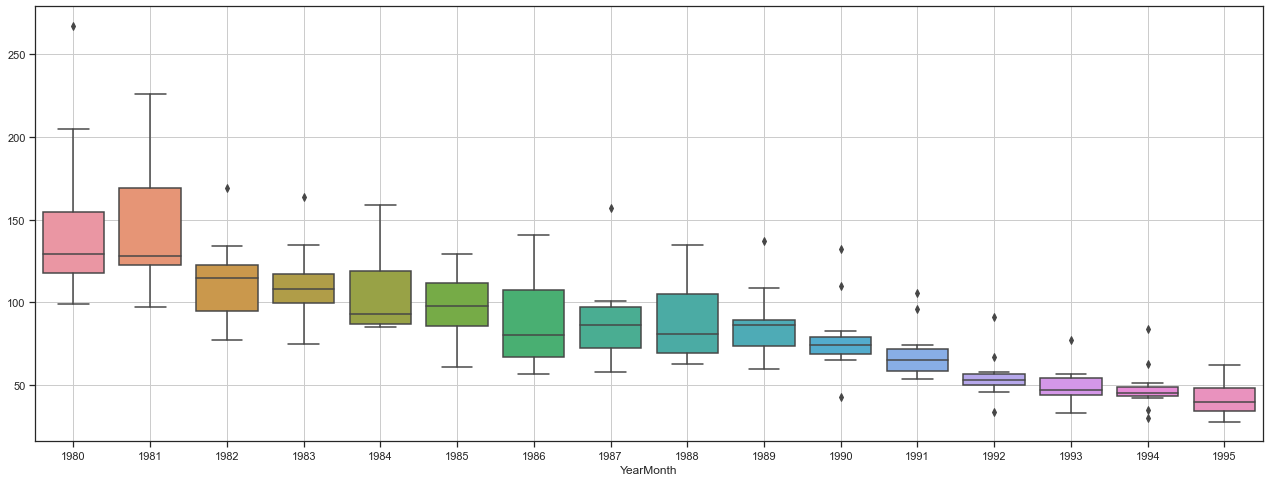

In [16]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = rose_df.index.year,y = rose_df.values[:,0],ax=ax)
plt.grid();

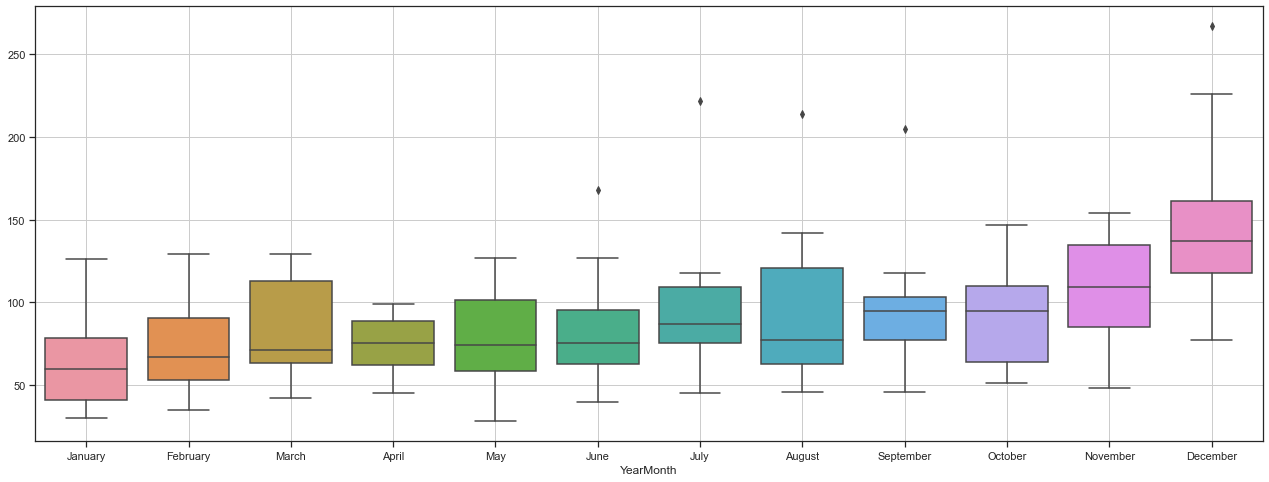

In [17]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = rose_df.index.month_name(),y = rose_df.values[:,0],ax=ax)
plt.grid();

In [18]:
monthly_sales_across_years = pd.pivot_table(rose_df, values = 'Rose', columns = rose_df.index.month_name(), index = rose_df.index.year)
monthly_sales_across_years

YearMonth,April,August,December,February,January,July,June,March,May,November,October,September
YearMonth,,,,,,,,,,,,
1980,99.0,129.0,267.0,118.0,112.0,118.0,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.0,226.0,129.0,126.0,222.0,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.0,169.0,77.0,89.0,117.0,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.0,164.0,108.0,75.0,109.0,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.0,159.0,85.0,88.0,87.0,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.0,129.0,82.0,61.0,87.0,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.0,141.0,65.0,57.0,110.0,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.0,157.0,65.0,58.0,87.0,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.0,135.0,115.0,63.0,79.0,83.0,70.0,67.0,100.0,116.0,102.0


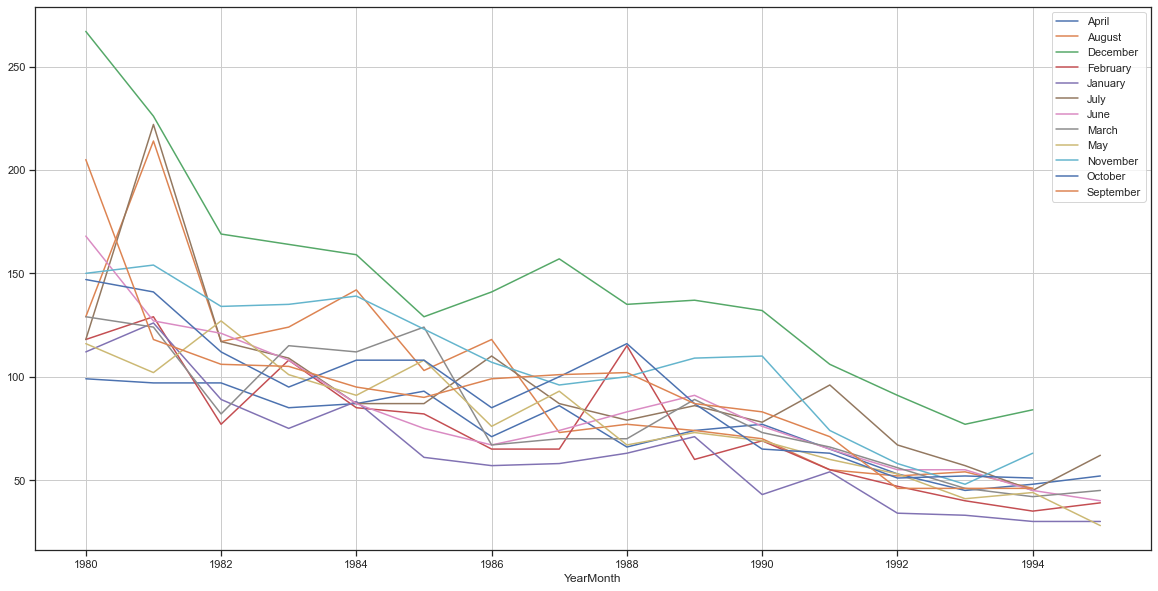

In [19]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

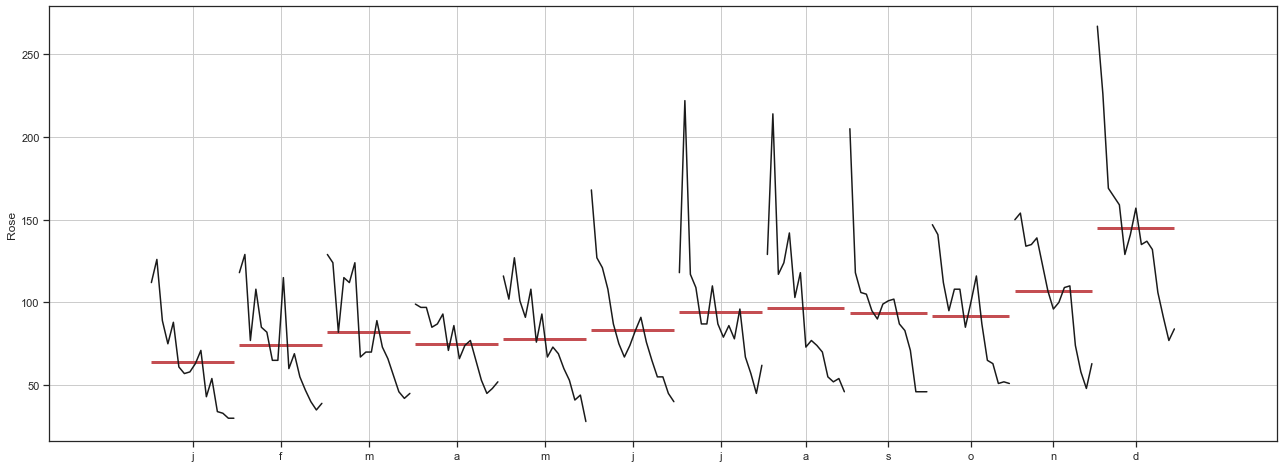

In [20]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(rose_df,ylabel='Rose',ax=ax)
plt.grid();

In [21]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

In [22]:
rose_add_decompose = seasonal_decompose(rose_df, model = 'additive', period = 12)

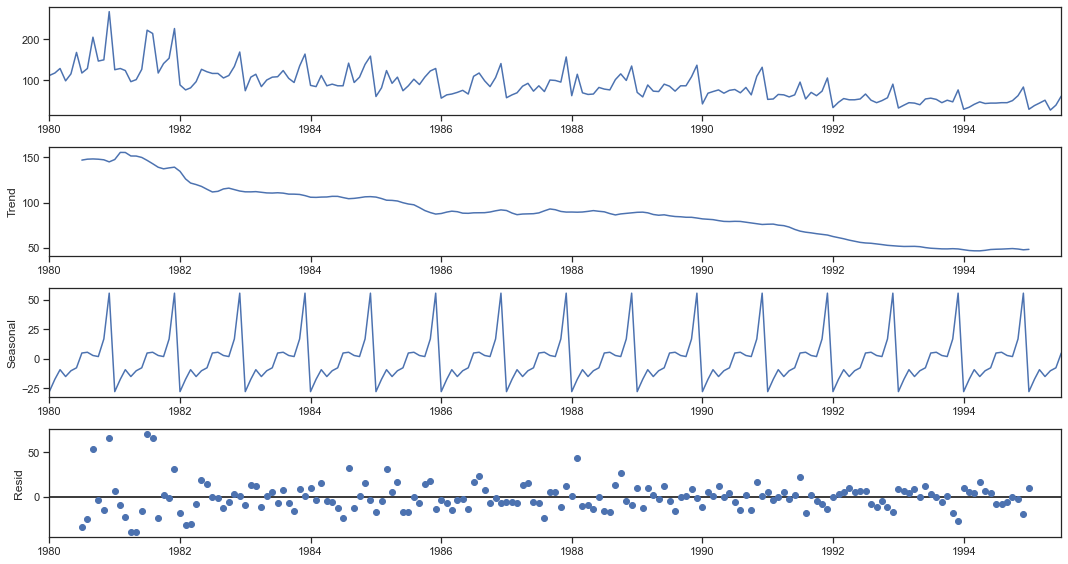

In [23]:
rose_add_decompose.plot();

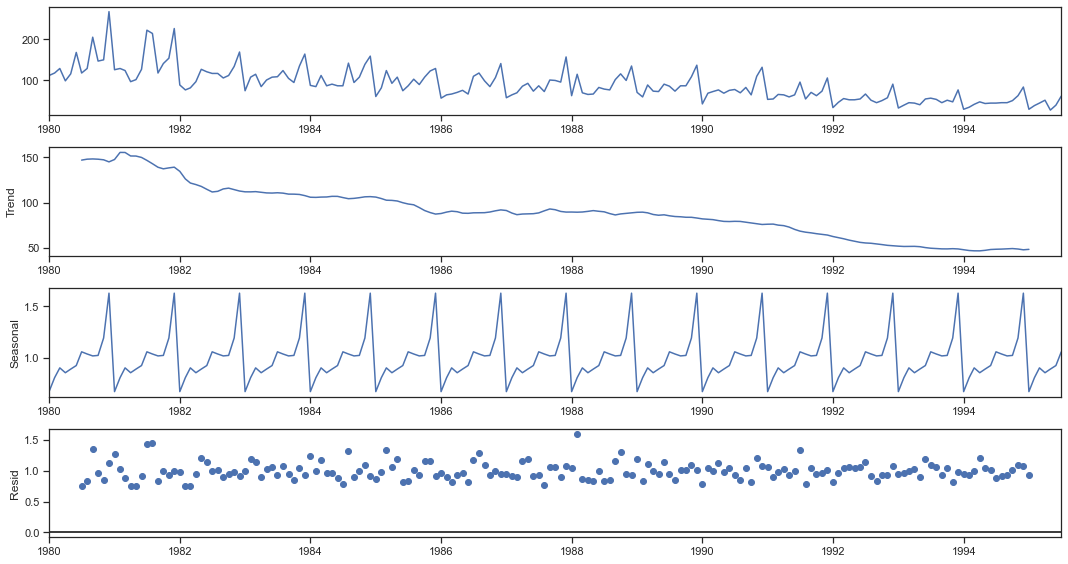

In [24]:
decomposition = seasonal_decompose(rose_df,model='multiplicative')
decomposition.plot();

# Data Split

In [25]:
train = rose_df[rose_df.index.year<1991] 
test = rose_df[rose_df.index.year>=1991]

In [26]:
test

,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0
1991-06-01,65.0
1991-07-01,96.0
1991-08-01,55.0
1991-09-01,71.0


In [27]:
print('===Train Head==')
display(train.head())
print('===Train Tail==')
display(train.tail())
print('===Test Head==')
display(test.head())
print('===Test Tail==')
display(test.tail())

===Train Head==


,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


===Train Tail==


,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


===Test Head==


,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


===Test Tail==


,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [28]:
train.shape

(132, 1)

In [29]:
test.shape

(55, 1)

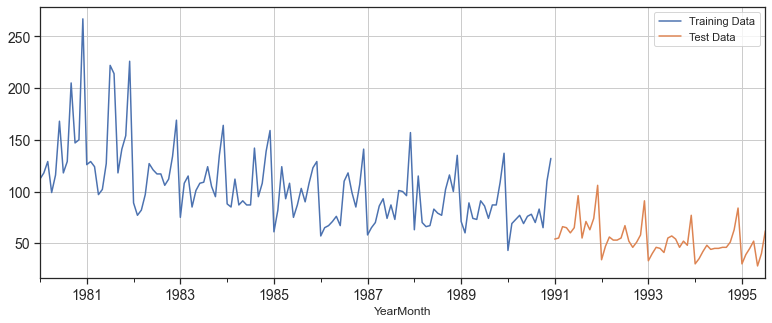

In [30]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Linear Regression

In [31]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [32]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [33]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [35]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

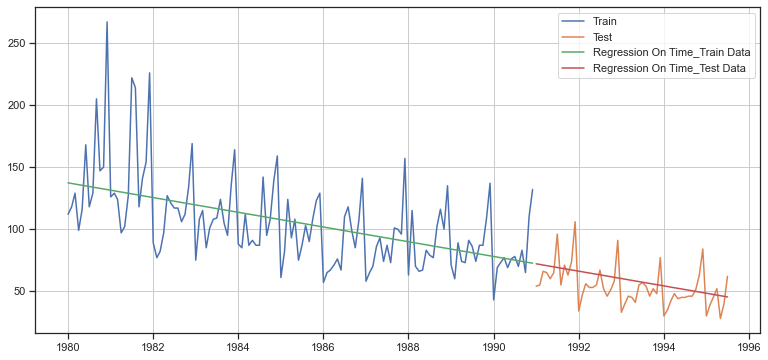

In [36]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1
LinearRegression_test['RegOnTime'] = test_predictions_model1


plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Train Data')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [37]:
from sklearn import metrics
rmse_model1_train = metrics.mean_squared_error(train['Rose'],train_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Train Data,  RMSE is %3.3f" %(rmse_model1_train))

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Train Data,  RMSE is 30.718
For RegressionOnTime forecast on the Test Data,  RMSE is 15.269


In [38]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,15.269416


# Naive Approach

In [39]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [40]:
NaiveModel_train['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_train['naive'].head()

YearMonth
1980-01-01    132.0
1980-02-01    132.0
1980-03-01    132.0
1980-04-01    132.0
1980-05-01    132.0
Name: naive, dtype: float64

In [41]:
NaiveModel_train.shape

(132, 2)

In [42]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

In [43]:
NaiveModel_test.shape

(55, 2)

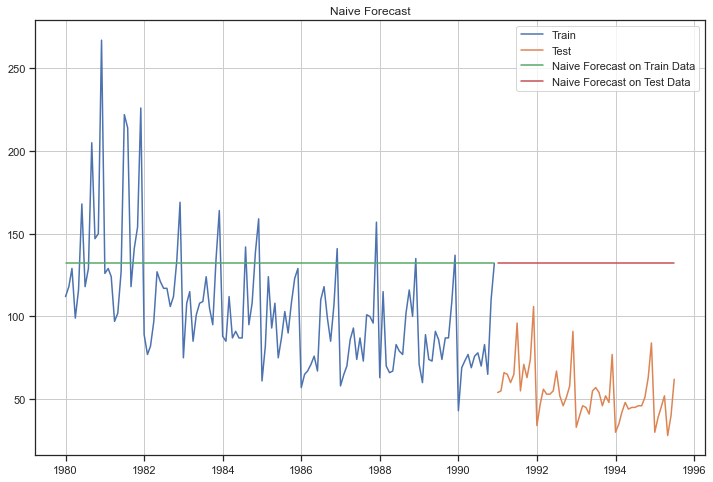

In [44]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Train Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [45]:
rmse_model2_train = metrics.mean_squared_error(NaiveModel_train['Rose'],NaiveModel_train['naive'],squared=False)


print("For Naive forecast on the Train Data,  RMSE is %3.3f" %(rmse_model2_train))


For Naive forecast on the Train Data,  RMSE is 45.064


In [46]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive forecast on the Test Data,  RMSE is 79.719


In [47]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,15.269416
NaiveModel,79.718824


# Simple Average

In [48]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [49]:
SimpleAverage_train['mean_Rose'] = train['Rose'].mean()
SimpleAverage_train.head()

,Rose,mean_Rose
YearMonth,,
1980-01-01,112.0,104.939394
1980-02-01,118.0,104.939394
1980-03-01,129.0,104.939394
1980-04-01,99.0,104.939394
1980-05-01,116.0,104.939394


In [50]:
SimpleAverage_test['mean_Rose'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_Rose
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


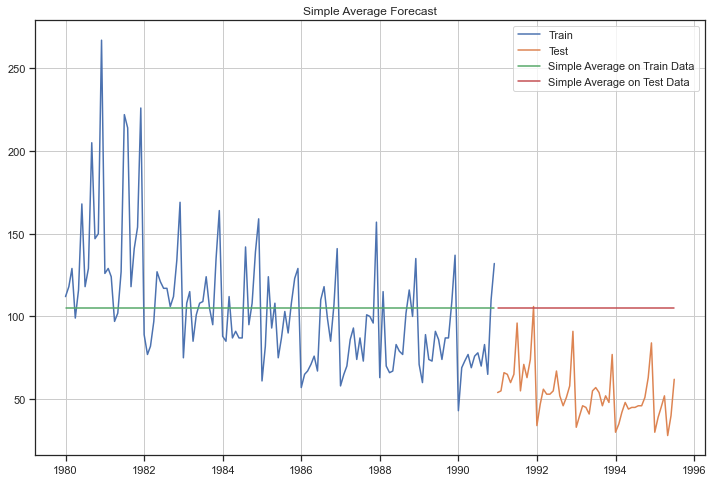

In [51]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_train['mean_Rose'], label='Simple Average on Train Data')
plt.plot(SimpleAverage_test['mean_Rose'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [52]:
rmse_model3_train = metrics.mean_squared_error(train['Rose'],SimpleAverage_train['mean_Rose'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_train))

For Simple Average forecast on the Test Data,  RMSE is 36.034


In [53]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_Rose'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [54]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,15.269416
NaiveModel,79.718824
SimpleAverageModel,53.460645


# Moving Average

In [55]:
MovingAverage = rose_df.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [56]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


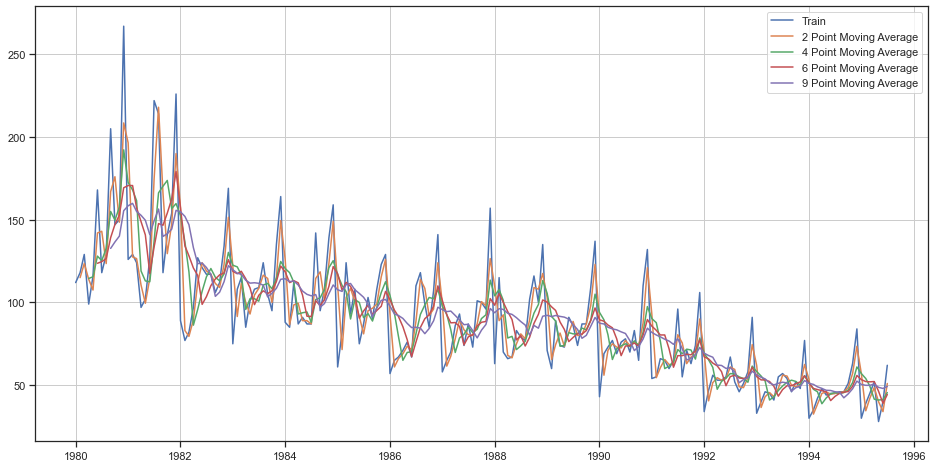

In [57]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [58]:
MovingAverage

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.50,NaN,NaN
1980-05-01,116.0,107.5,115.50,NaN,NaN
...,...,...,...,...,...
1995-03-01,45.0,42.0,49.50,52.000000,49.888889
1995-04-01,52.0,48.5,41.50,52.166667,50.666667
1995-05-01,28.0,40.0,41.00,46.333333,48.666667


In [59]:
MovingAverage_train = MovingAverage[MovingAverage.index.year<1991] 
MovingAverage_test = MovingAverage[MovingAverage.index.year>=1991]

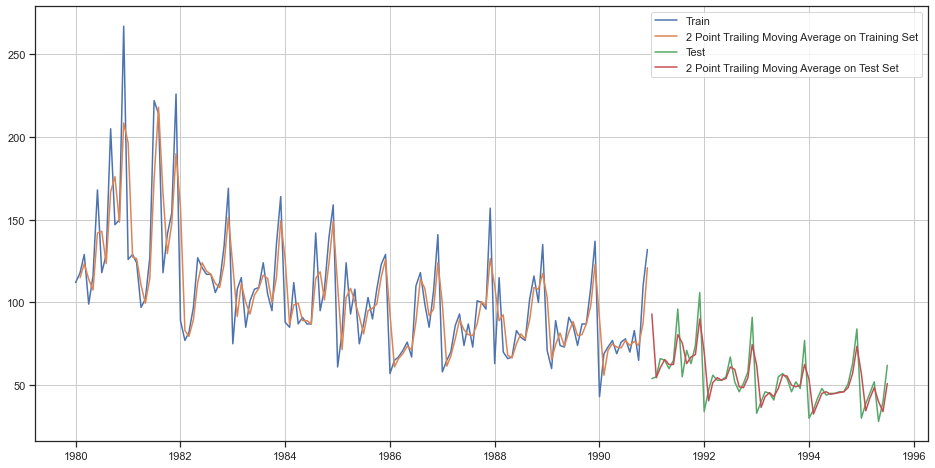

In [60]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage_train['Rose'], label='Train')

plt.plot(MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.plot(MovingAverage_test['Rose'], label='Test')
plt.plot(MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

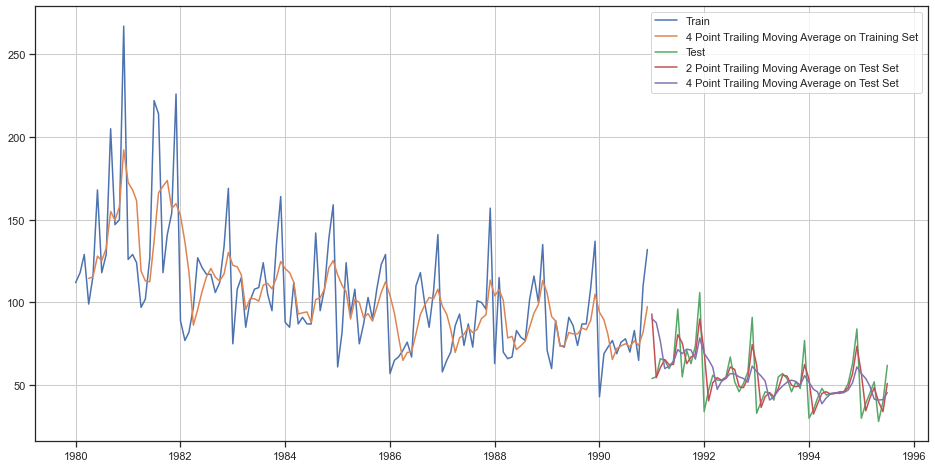

In [61]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage_train['Rose'], label='Train')

plt.plot(MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(MovingAverage_test['Rose'], label='Test')
plt.plot(MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

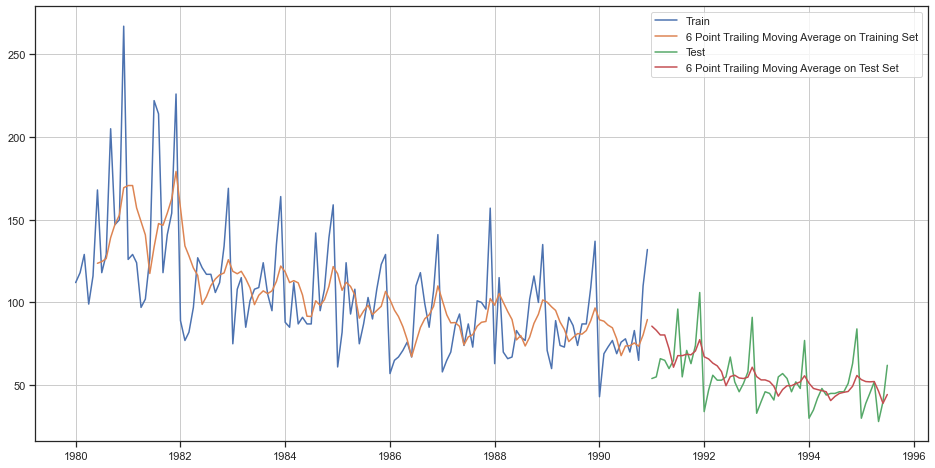

In [62]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage_train['Rose'], label='Train')

plt.plot(MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')

plt.plot(MovingAverage_test['Rose'], label='Test')
plt.plot(MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

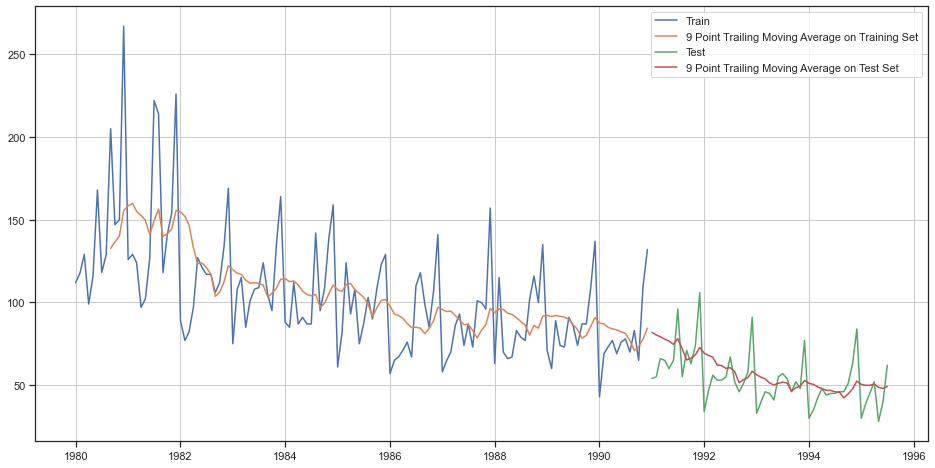

In [63]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage_train['Rose'], label='Train')

plt.plot(MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')
plt.plot(MovingAverage_test['Rose'], label='Test')

plt.plot(MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [64]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 14.568
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 14.728 


# All Model Comparison

In [65]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,15.269416
NaiveModel,79.718824
SimpleAverageModel,53.460645
2pointTrailingMovingAverage,11.529409
4pointTrailingMovingAverage,14.450661
6pointTrailingMovingAverage,14.567606
9pointTrailingMovingAverage,14.727902


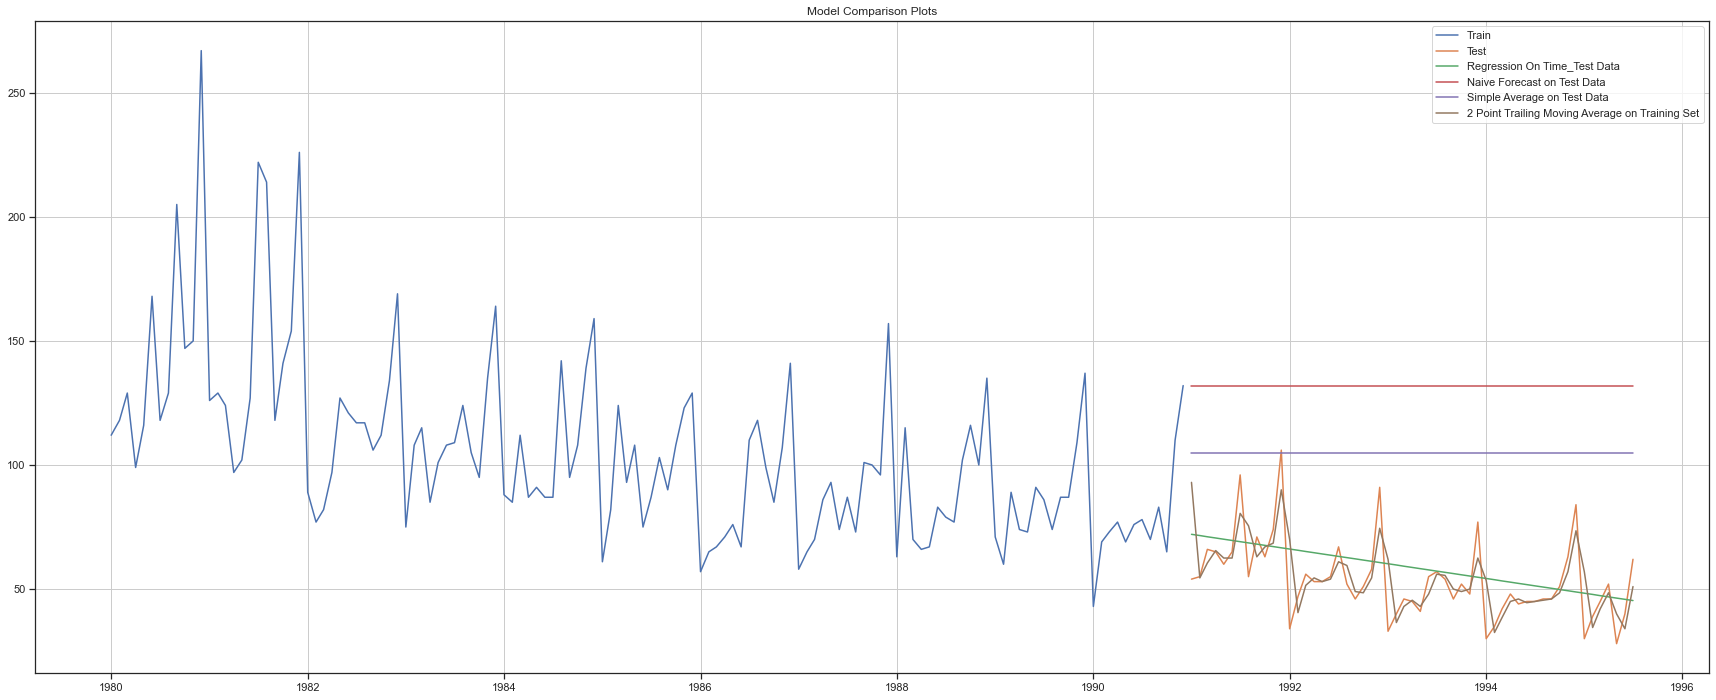

In [66]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_Rose'], label='Simple Average on Test Data')

plt.plot(MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# SES

In [67]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.tools.eval_measures as      em

In [68]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated' )

In [69]:
model_SES_autofit = model_SES.fit(optimized=True)

In [70]:
model_SES_autofit.params

{'smoothing_level': 0.09874983698117956,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38702481818487,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [71]:
SES_predict_rose = model_SES_autofit.forecast(steps=len(test))
SES_predict_rose

1991-01-01    87.104997
1991-02-01    87.104997
1991-03-01    87.104997
1991-04-01    87.104997
1991-05-01    87.104997
1991-06-01    87.104997
1991-07-01    87.104997
1991-08-01    87.104997
1991-09-01    87.104997
1991-10-01    87.104997
1991-11-01    87.104997
1991-12-01    87.104997
1992-01-01    87.104997
1992-02-01    87.104997
1992-03-01    87.104997
1992-04-01    87.104997
1992-05-01    87.104997
1992-06-01    87.104997
1992-07-01    87.104997
1992-08-01    87.104997
1992-09-01    87.104997
1992-10-01    87.104997
1992-11-01    87.104997
1992-12-01    87.104997
1993-01-01    87.104997
1993-02-01    87.104997
1993-03-01    87.104997
1993-04-01    87.104997
1993-05-01    87.104997
1993-06-01    87.104997
1993-07-01    87.104997
1993-08-01    87.104997
1993-09-01    87.104997
1993-10-01    87.104997
1993-11-01    87.104997
1993-12-01    87.104997
1994-01-01    87.104997
1994-02-01    87.104997
1994-03-01    87.104997
1994-04-01    87.104997
1994-05-01    87.104997
1994-06-01    87

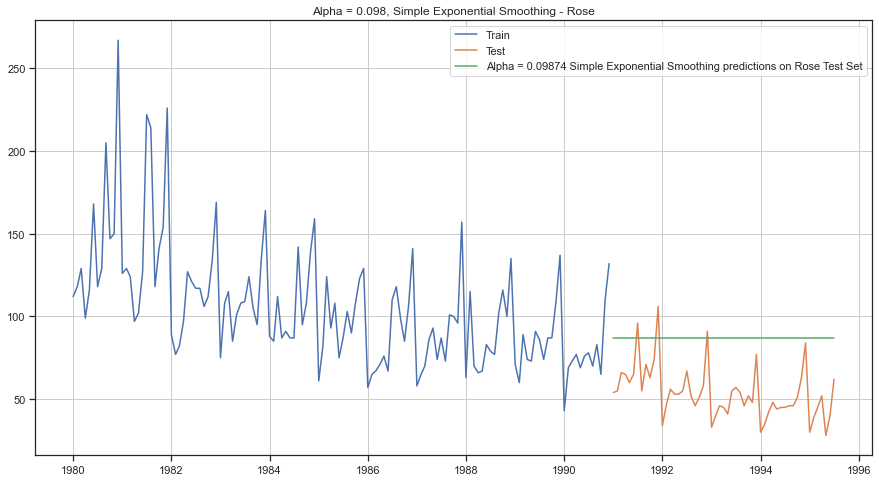

In [72]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict_rose, label='Alpha = 0.09874 Simple Exponential Smoothing predictions on Rose Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.098, Simple Exponential Smoothing - Rose');

In [73]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [74]:
print('SES RMSE:',metrics.mean_squared_error(test.values,SES_predict_rose.values,squared=False))
#different way to calculate RMSE
print('SES RMSE :',em.rmse(test.values,SES_predict_rose.values)[0])

SES RMSE: 36.796350352345755
SES RMSE : 36.79635035234575


In [75]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,15.269416
NaiveModel,79.718824
SimpleAverageModel,53.460645
2pointTrailingMovingAverage,11.529409
4pointTrailingMovingAverage,14.450661
6pointTrailingMovingAverage,14.567606
9pointTrailingMovingAverage,14.727902
Simple Exponential Smoothing,53.460645


# Model 5: Double Exponential Smoothing (Holt's Model)

In [76]:
train.tail()

,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


In [77]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [78]:
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('Double Exponential Smoothing Estimated Parameters :')
print(model_DES.params)

Double Exponential Smoothing Estimated Parameters :
{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 1.6610391146660035e-10, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81553690867275, 'initial_trend': -0.4943781897068274, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [79]:
# Forecasting using this model for the duration of the test set
DES_predict_rose =  model_DES.forecast(len(test))
DES_predict_rose

1991-01-01    72.063238
1991-02-01    71.568859
1991-03-01    71.074481
1991-04-01    70.580103
1991-05-01    70.085725
1991-06-01    69.591347
1991-07-01    69.096969
1991-08-01    68.602590
1991-09-01    68.108212
1991-10-01    67.613834
1991-11-01    67.119456
1991-12-01    66.625078
1992-01-01    66.130699
1992-02-01    65.636321
1992-03-01    65.141943
1992-04-01    64.647565
1992-05-01    64.153187
1992-06-01    63.658808
1992-07-01    63.164430
1992-08-01    62.670052
1992-09-01    62.175674
1992-10-01    61.681296
1992-11-01    61.186918
1992-12-01    60.692539
1993-01-01    60.198161
1993-02-01    59.703783
1993-03-01    59.209405
1993-04-01    58.715027
1993-05-01    58.220648
1993-06-01    57.726270
1993-07-01    57.231892
1993-08-01    56.737514
1993-09-01    56.243136
1993-10-01    55.748757
1993-11-01    55.254379
1993-12-01    54.760001
1994-01-01    54.265623
1994-02-01    53.771245
1994-03-01    53.276866
1994-04-01    52.782488
1994-05-01    52.288110
1994-06-01    51

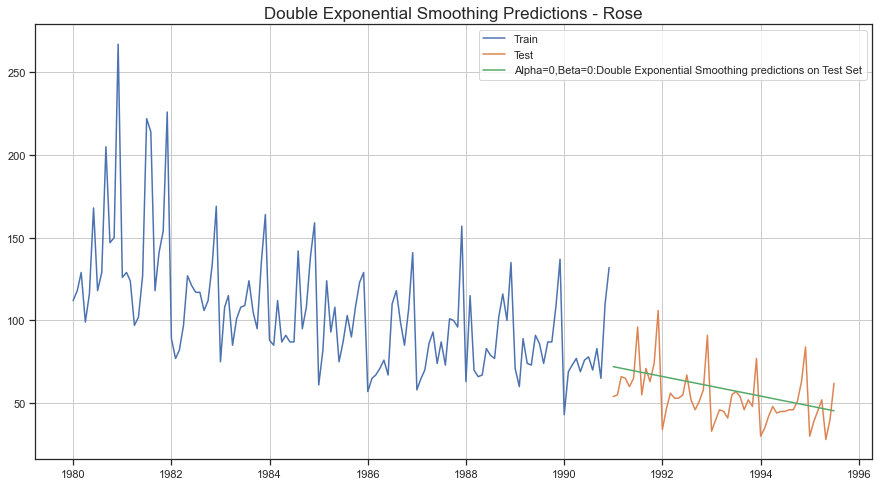

In [80]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Predictions - Rose', fontsize=17);

In [81]:
print('DES RMSE:',metrics.mean_squared_error(test.values,DES_predict_rose.values,squared=False))

DES RMSE: 15.269404603733328


In [82]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test.values,DES_predict_rose.values,squared=False)]},index=['Double Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,15.269416
NaiveModel,79.718824
SimpleAverageModel,53.460645
2pointTrailingMovingAverage,11.529409
4pointTrailingMovingAverage,14.450661
6pointTrailingMovingAverage,14.567606
9pointTrailingMovingAverage,14.727902
Simple Exponential Smoothing,53.460645
Double Exponential Smoothing,15.269405


# Triple Exponential Smoothing (Holt - Winter's Model) (A,A)


In [83]:
TES_train = train.copy()
TES_test = test.copy()

In [84]:
model_TES = ExponentialSmoothing(TES_train,trend='additive',seasonal='additive',initialization_method='estimated')


In [85]:
model_TES_autofit = model_TES.fit()


In [86]:
model_TES_autofit.params

{'smoothing_level': 0.08872764725999983,
 'smoothing_trend': 9.006425383910208e-06,
 'smoothing_seasonal': 0.00030220468692033857,
 'damping_trend': nan,
 'initial_level': 146.86313344217183,
 'initial_trend': -0.54920783338383,
 'initial_seasons': array([-31.29615978, -18.85729122, -10.84129035, -21.39327001,
        -12.61174453,  -7.17892692,   2.72463253,   8.78522404,
          4.87498352,   3.01144155,  21.09509348,  63.26062685]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [87]:
TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train

,Rose,auto_predict
YearMonth,,
1980-01-01,112.0,115.017766
1980-02-01,118.0,126.639665
1980-03-01,129.0,133.339871
1980-04-01,99.0,121.853605
1980-05-01,116.0,128.058145
...,...,...
1990-08-01,70.0,87.154061
1990-09-01,83.0,81.166577
1990-10-01,65.0,78.921153


In [88]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,auto_predict
YearMonth,,
1991-01-01,54.0,42.493878
1991-02-01,55.0,54.383286
1991-03-01,66.0,61.850018
1991-04-01,65.0,50.748583
1991-05-01,60.0,58.981025


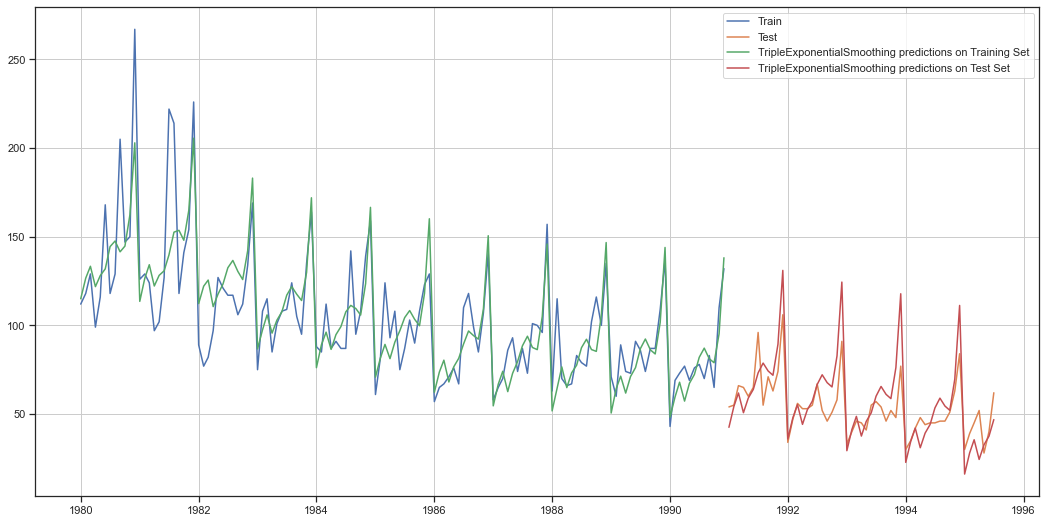

In [89]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')
plt.plot(TES_train['auto_predict'], label='TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [90]:
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 14.254


In [91]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['TripleExponentialSmoothing(A,A)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
RegressionOnTime,15.269416
NaiveModel,79.718824
SimpleAverageModel,53.460645
2pointTrailingMovingAverage,11.529409
4pointTrailingMovingAverage,14.450661
6pointTrailingMovingAverage,14.567606
9pointTrailingMovingAverage,14.727902
Simple Exponential Smoothing,53.460645
Double Exponential Smoothing,15.269405
"TripleExponentialSmoothing(A,A)",14.253559


# Triple Exponential Smoothing (Holt - Winter's Model) (A,M)


In [92]:
TESAM_Train=train.copy()
TESAM_Test=test.copy()

In [93]:
model_TES = ExponentialSmoothing(TESAM_Train,trend='additive',seasonal='multiplicative',initialization_method='estimated')


In [94]:
model_TES_autofit = model_TES.fit()


In [95]:
model_TES_autofit.params

{'smoothing_level': 0.07580378115501289,
 'smoothing_trend': 0.04082731831671567,
 'smoothing_seasonal': 0.0008792861232047841,
 'damping_trend': nan,
 'initial_level': 163.87796236599962,
 'initial_trend': -0.9559811417358383,
 'initial_seasons': array([0.68432572, 0.77587329, 0.84828062, 0.74119702, 0.83386517,
        0.90761668, 0.99838676, 1.06374484, 1.00486364, 0.9847888 ,
        1.14803087, 1.58276201]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [96]:
TESAM_Train['auto_predict'] = model_TES_autofit.fittedvalues
TESAM_Train

,Rose,auto_predict
YearMonth,,
1980-01-01,112.0,111.491703
1980-02-01,118.0,125.710563
1980-03-01,129.0,135.968215
1980-04-01,99.0,117.594079
1980-05-01,116.0,129.803724
...,...,...
1990-08-01,70.0,90.289714
1990-09-01,83.0,83.582156
1990-10-01,65.0,81.619234


In [97]:
TESAM_Test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TESAM_Test.head()

,Rose,auto_predict
YearMonth,,
1991-01-01,54.0,56.036899
1991-02-01,55.0,63.349325
1991-03-01,66.0,69.021015
1991-04-01,65.0,60.120355
1991-05-01,60.0,67.380193


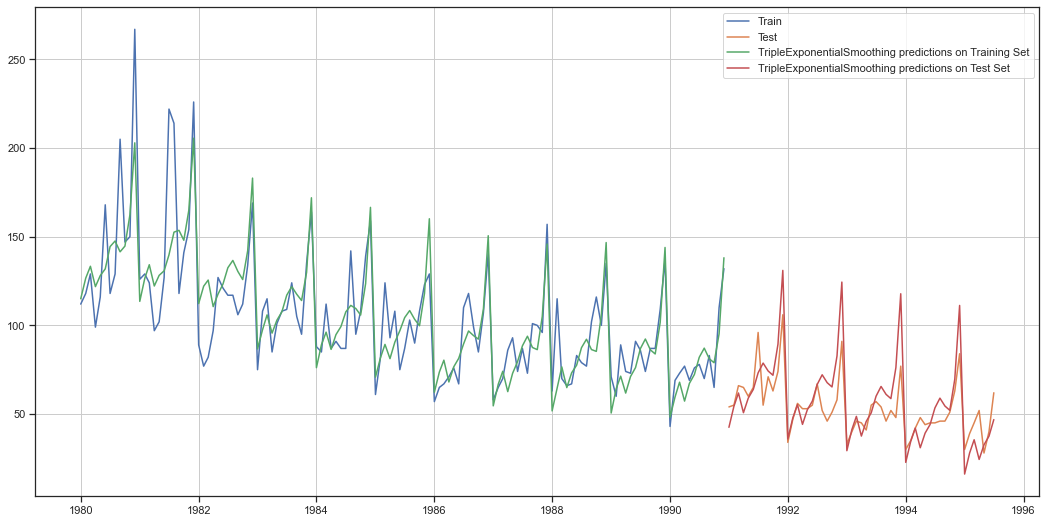

In [98]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')
plt.plot(TES_train['auto_predict'], label='TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [99]:
rmse_model7_test_1 = metrics.mean_squared_error(TESAM_Test['Rose'],TESAM_Test['auto_predict'],squared=False)
print("For Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model7_test_1))

For Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 19.396


In [100]:
rmse_model7_test_1

19.396010966329246

In [101]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_model7_test_1]}
                           ,index=['TripleExponentialSmoothing(A,M)'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
RegressionOnTime,15.269416
NaiveModel,79.718824
SimpleAverageModel,53.460645
2pointTrailingMovingAverage,11.529409
4pointTrailingMovingAverage,14.450661
6pointTrailingMovingAverage,14.567606
9pointTrailingMovingAverage,14.727902
Simple Exponential Smoothing,53.460645
Double Exponential Smoothing,15.269405
"TripleExponentialSmoothing(A,A)",14.253559


# Model Comparison

In [102]:
resultsDf.sort_values(by='Test RMSE')

,Test RMSE
2pointTrailingMovingAverage,11.529409
"TripleExponentialSmoothing(A,A)",14.253559
4pointTrailingMovingAverage,14.450661
6pointTrailingMovingAverage,14.567606
9pointTrailingMovingAverage,14.727902
Double Exponential Smoothing,15.269405
RegressionOnTime,15.269416
"TripleExponentialSmoothing(A,M)",19.396011
SimpleAverageModel,53.460645
Simple Exponential Smoothing,53.460645


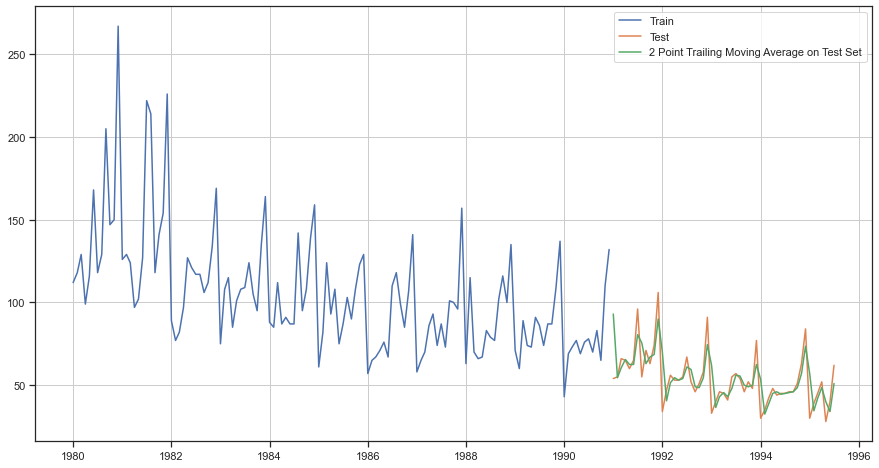

In [103]:
plt.plot(MovingAverage_train[['Rose']],label='Train')
plt.plot(MovingAverage_test[['Rose']],label='Test')
plt.plot(MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

# stationarity

In [104]:
from statsmodels.tsa.stattools import adfuller
dfrs = adfuller(rose_df,regression='ct')
print('DF test statistic is %3.3f' %dfrs[0])
print('DF test p-value is' ,dfrs[1])
print('Number of lags used' ,dfrs[2])

DF test statistic is -2.240
DF test p-value is 0.46754169781965976
Number of lags used 13


In [105]:
dfrs = adfuller(rose_df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfrs[0])
print('DF test p-value is' ,dfrs[1])
print('Number of lags used' ,dfrs[2])

DF test statistic is -8.162
DF test p-value is 3.012534321134673e-11
Number of lags used 12


In [106]:
dfrs

(-8.1622748046818,
 3.012534321134673e-11,
 12,
 173,
 {'1%': -4.012075815845091,
  '5%': -3.4361787125348875,
  '10%': -3.1421311308149904},
 1509.077240781311)

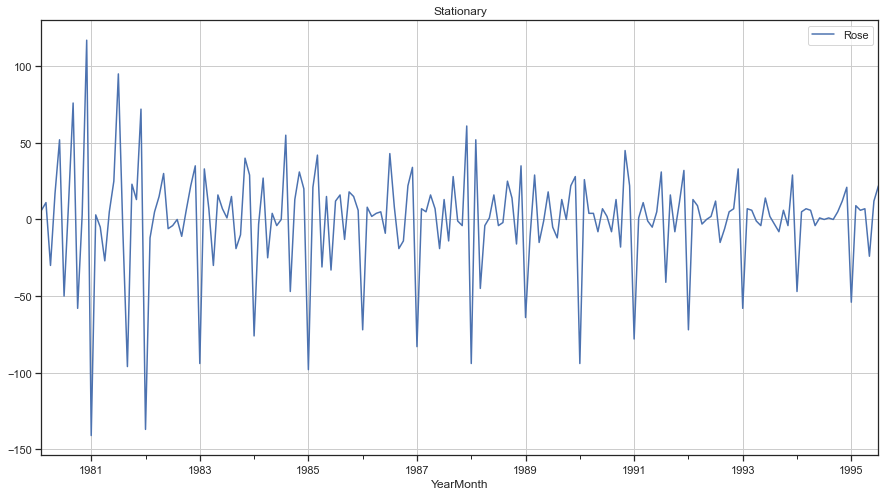

In [107]:
rose_df.diff().dropna().plot(grid=True);
plt.title('Stationary');

# ARIMA Model by picking the pdq values from the ACF/ PACF plot

# Auto ARIMA

In [108]:
import itertools

p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [109]:
ROSE_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ROSE_ARIMA_AIC

,param,AIC


In [110]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ROSE_ARIMA_AIC = ROSE_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535806
ARIMA(0, 1, 3) - AIC:1280.5453761734655
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.5742295380064
ARIMA(1, 1, 2) - AIC:1279.8707234231922
ARIMA(1, 1, 3) - AIC:1281.8707223309998
ARIMA(2, 1, 0) - AIC:1298.6110341605004
ARIMA(2, 1, 1) - AIC:1281.5078621868543
ARIMA(2, 1, 2) - AIC:1281.8707222264356
ARIMA(2, 1, 3) - AIC:1274.6954123405285
ARIMA(3, 1, 0) - AIC:1297.4810917271739
ARIMA(3, 1, 1) - AIC:1282.4192776271989
ARIMA(3, 1, 2) - AIC:1283.720740597716
ARIMA(3, 1, 3) - AIC:1278.6679167115944


In [111]:
ROSE_ARIMA_AIC_DIFF = pd.DataFrame(columns=['param', 'AIC'])
ROSE_ARIMA_AIC_DIFF

,param,AIC


In [112]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Rose'].diff().dropna().values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ROSE_ARIMA_AIC_DIFF = ROSE_ARIMA_AIC_DIFF.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1453.686409801051
ARIMA(0, 1, 1) - AIC:1330.8642024197125
ARIMA(0, 1, 2) - AIC:1281.561210267042
ARIMA(0, 1, 3) - AIC:1285.1997864776113
ARIMA(1, 1, 0) - AIC:1407.410113685176
ARIMA(1, 1, 1) - AIC:1315.7930865186502
ARIMA(1, 1, 2) - AIC:1278.055799700399
ARIMA(1, 1, 3) - AIC:1284.818466666598
ARIMA(2, 1, 0) - AIC:1364.6902547217119
ARIMA(2, 1, 1) - AIC:1297.8603325328029
ARIMA(2, 1, 2) - AIC:1279.3660395605064
ARIMA(2, 1, 3) - AIC:1288.6170021133078
ARIMA(3, 1, 0) - AIC:1348.1809306116638
ARIMA(3, 1, 1) - AIC:1297.0354183460636
ARIMA(3, 1, 2) - AIC:1297.6219751580854
ARIMA(3, 1, 3) - AIC:1281.2166811853472


In [113]:
ROSE_ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
11,"(2, 1, 3)",1274.695412
15,"(3, 1, 3)",1278.667917
2,"(0, 1, 2)",1279.671529
6,"(1, 1, 2)",1279.870723
3,"(0, 1, 3)",1280.545376


In [114]:
ROSE_ARIMA_AIC_DIFF.sort_values(by='AIC',ascending=True).head()

,param,AIC
6,"(1, 1, 2)",1278.055800
10,"(2, 1, 2)",1279.366040
15,"(3, 1, 3)",1281.216681
2,"(0, 1, 2)",1281.561210
7,"(1, 1, 3)",1284.818467


In [115]:
auto_ARIMA = ARIMA(train, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 20 Feb 2022   AIC                           1274.695
Time:                        14:46:57   BIC                           1291.947
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6783      0.084    -19.999      0.000      -1.843      -1.514
ar.L2         -0.7291      0.084     -8.687      0.000      -0.894      -0.565
ma.L1          1.0446      0.618      1.691      0.0

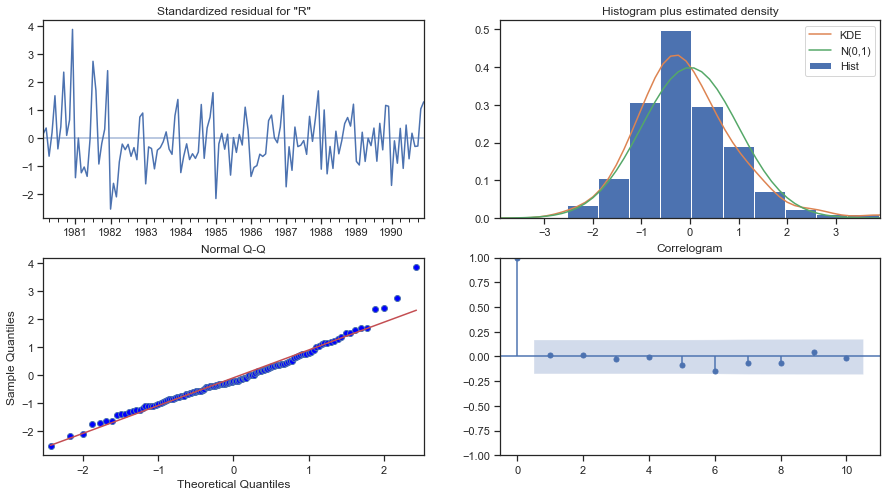

In [116]:
results_auto_ARIMA.plot_diagnostics();

In [117]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))
predicted_auto_ARIMA

1991-01-01    85.595789
1991-02-01    90.535998
1991-03-01    81.967217
1991-04-01    92.746555
1991-05-01    80.902653
1991-06-01    92.921603
1991-07-01    81.384994
1991-08-01    91.984470
1991-09-01    82.606135
1991-10-01    90.618245
1991-11-01    84.008799
1991-12-01    89.260200
1992-01-01    85.265393
1992-02-01    88.141340
1992-03-01    86.227055
1992-04-01    87.343088
1992-05-01    86.865662
1992-06-01    86.853281
1992-07-01    87.222129
1992-08-01    86.612116
1992-09-01    87.366993
1992-10-01    86.544813
1992-11-01    87.374335
1992-12-01    86.581558
1993-01-01    87.307312
1993-02-01    86.667253
1993-03-01    87.212353
1993-04-01    86.764147
1993-05-01    87.118966
1993-06-01    86.850238
1993-07-01    87.042563
1993-08-01    86.915700
1993-09-01    86.988399
1993-10-01    86.958878
1993-11-01    86.955422
1993-12-01    86.982745
1994-01-01    86.939409
1994-02-01    86.992220
1994-03-01    86.935181
1994-04-01    86.992408
1994-05-01    86.937948
1994-06-01    86

In [118]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [119]:
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.813087599742445 
MAPE: 75.83972616340353


In [120]:
resultsARIMA = pd.DataFrame({'Test RMSE': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,1,3)'])
resultsARIMA

,Test RMSE,Test MAPE Rose
"ARIMA(2,1,3)",36.813088,75.839726


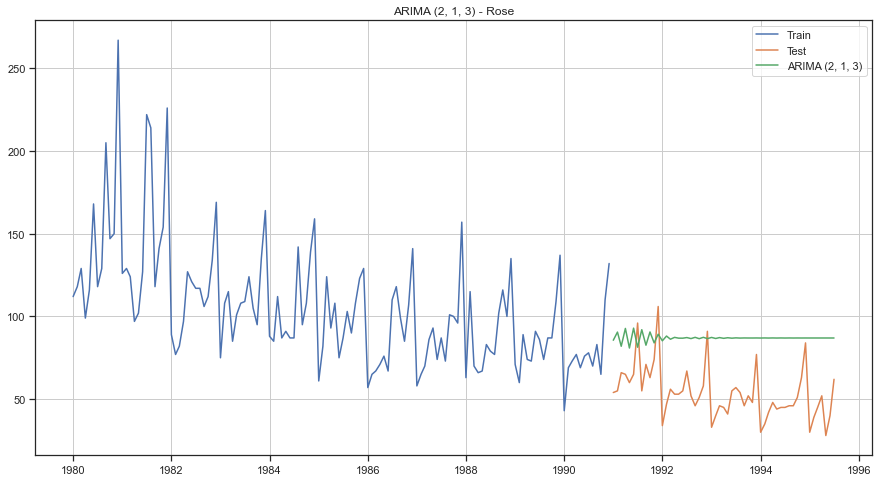

In [121]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predicted_auto_ARIMA,label='ARIMA (2, 1, 3)')


plt.legend(loc='best')
plt.grid()
plt.title('ARIMA (2, 1, 3) - Rose');

ACF and PACF

In [122]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Text(0.5, 1.0, 'Rose Training Data Autocorrelation')

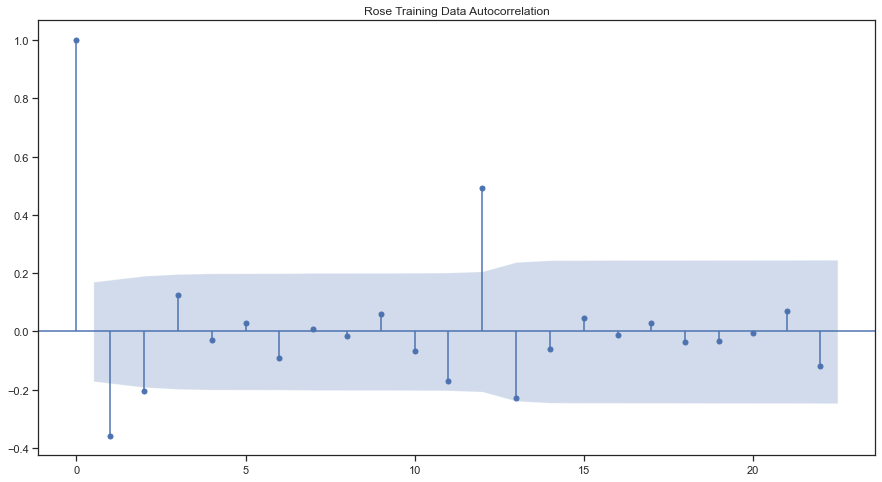

In [123]:
plot_acf(train.diff(), missing='drop', alpha=0.05)
plt.title('Rose Training Data Autocorrelation')

Text(0.5, 1.0, 'Rose Training Data Partial Autocorrelation')

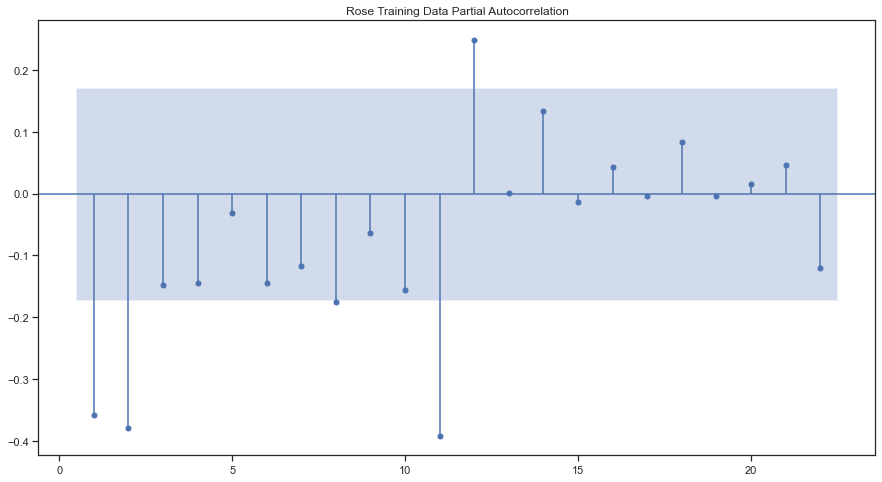

In [124]:
plot_pacf(train.diff().dropna(), zero=False, alpha=0.05, method='ywmle')
plt.title('Rose Training Data Partial Autocorrelation')


In [125]:
manual_ARIMA = ARIMA(train['Rose'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 20 Feb 2022   AIC                           1281.871
Time:                        14:47:01   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

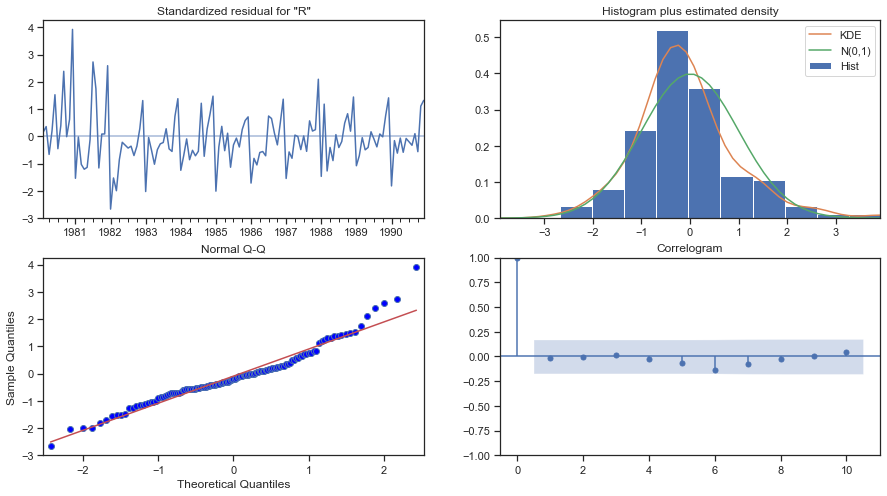

In [126]:
results_manual_ARIMA.plot_diagnostics();

In [127]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [128]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.871306201948194 
MAPE: 76.05696032636567


In [129]:
temp_resultsARIMA = pd.DataFrame({'Test RMSE': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,1,2)'])


resultsARIMA = pd.concat([resultsARIMA,temp_resultsARIMA])

resultsARIMA

,Test RMSE,Test MAPE Rose
"ARIMA(2,1,3)",36.813088,75.839726
"ARIMA(2,1,2)",36.871306,76.056960


Text(0.5, 1.0, 'ARIMA (2, 1, 2) Forecast - Rose')

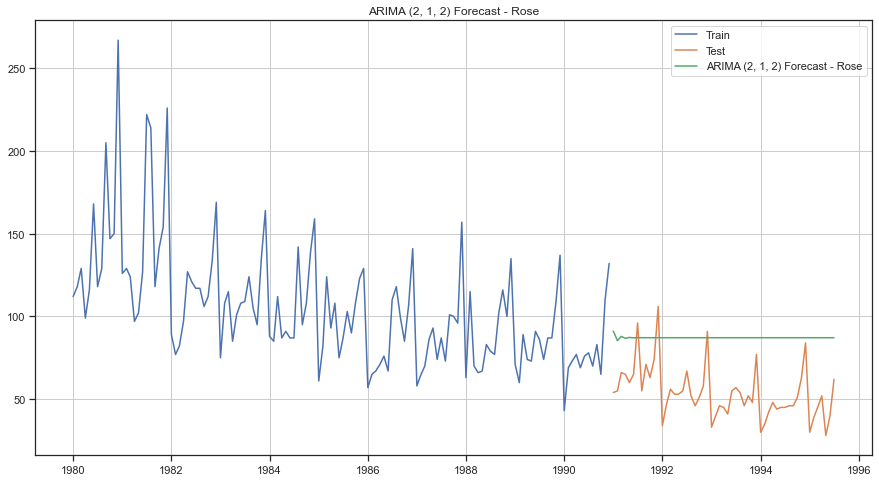

In [130]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(predicted_manual_ARIMA, label = 'ARIMA (2, 1, 2) Forecast - Rose')
plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (2, 1, 2) Forecast - Rose')

# SARIMA

In [131]:
SARIMA_AIC_diff = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_diff

,param,seasonal,AIC


In [132]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [133]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].diff().dropna().values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC_diff.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1443.509745812702
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1247.0445014353731
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1071.7475155711652
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:4079.6203950301483
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1240.6413561967206
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1221.345476424424
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1061.9090245267905
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3437.2185948114507
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1058.862666647728
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1060.8433878930878
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1052.0268464118856
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3518.8088417193208
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:941.718735428328
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:941.2239252251659
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:940.894018667553
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3820.866477741354
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1311.2417422187557
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1132.6295934433142
SARIMA(0, 1, 1)x(0,

SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:922.6062557326998
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:923.875184010355
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:925.8961244985612
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3507.8726409786746
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:804.0669766691307
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:806.0350107255579
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:804.9999248005961
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3550.7018263295454
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1248.5568112639505
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1079.6967089020868
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:913.2411305519662
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3782.7212941145335
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.4403781748158
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1047.1772416121737
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:909.2994499356028
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:161.67931150144716
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:901.0214272085689
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:902.1879163549067
SARIMA(2, 1, 2)x(2, 0

In [134]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [135]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207175
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380895
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3586.802455258465
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386002
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635750373
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3531.7454740467456
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697546
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945867
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:4080.962786826799
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.753540393109
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.748270265051
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136127429
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3159.536319367785
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918339
SARIMA(0, 1, 1)x(0, 0, 2

SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608119215
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.639956536955
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866288954
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3724.447555964424
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:785.393260025772
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.3639259064494
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:787.0598888442282
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3593.5160318249104
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.9102116146685
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.964355259821
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311103143
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:5973.600046938469
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713704332
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909354771824
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.666148879695
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:2688.5428344340376
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464441348852
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781889114674
SARIMA(2, 1, 2)x(2, 0, 2, 

In [136]:
SARIMA_AIC.sort_values(by=['AIC']).head(10)

,param,seasonal,AIC
179,"(2, 1, 3)","(0, 0, 3, 12)",18.000000
83,"(1, 1, 1)","(0, 0, 3, 12)",88.912654
35,"(0, 1, 2)","(0, 0, 3, 12)",158.047175
222,"(3, 1, 1)","(3, 0, 2, 12)",774.400287
238,"(3, 1, 2)","(3, 0, 2, 12)",774.880936
220,"(3, 1, 1)","(3, 0, 0, 12)",775.426699
221,"(3, 1, 1)","(3, 0, 1, 12)",775.495330
252,"(3, 1, 3)","(3, 0, 0, 12)",775.561018
237,"(3, 1, 2)","(3, 0, 1, 12)",776.346214
253,"(3, 1, 3)","(3, 0, 1, 12)",776.369041


In [137]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2,1,3),
                                seasonal_order=(0,0,3,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(0, 0, 3, 12)   Log Likelihood                   0.000
Date:                            Sun, 20 Feb 2022   AIC                             18.000
Time:                                    15:03:41   BIC                             40.598
Sample:                                01-01-1980   HQIC                            27.117
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3303     21.012      0.063      0.950     -39.853      42.513
ar.L2          2.7021         -0   

In [138]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(0,1,2),
                                seasonal_order=(0,0,3,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                       Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(0, 0, [1, 2, 3], 12)   Log Likelihood                 -73.024
Date:                                    Sun, 20 Feb 2022   AIC                            158.047
Time:                                            15:03:42   BIC                            173.178
Sample:                                        01-01-1980   HQIC                           164.154
                                             - 12-01-1990                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.0280      0.001   1671.017      0

In [139]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2,1,3),
                                seasonal_order=(0,0,3,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(0, 0, 3, 12)   Log Likelihood                   0.000
Date:                            Sun, 20 Feb 2022   AIC                             18.000
Time:                                    15:03:44   BIC                             40.598
Sample:                                01-01-1980   HQIC                            27.117
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3303     21.012      0.063      0.950     -39.853      42.513
ar.L2          2.7021         -0   

In [140]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(3,1,1),
                                seasonal_order=(3,0,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Sun, 20 Feb 2022   AIC                            774.400
Time:                                         15:03:46   BIC                            799.618
Sample:                                     01-01-1980   HQIC                           784.578
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.201       0

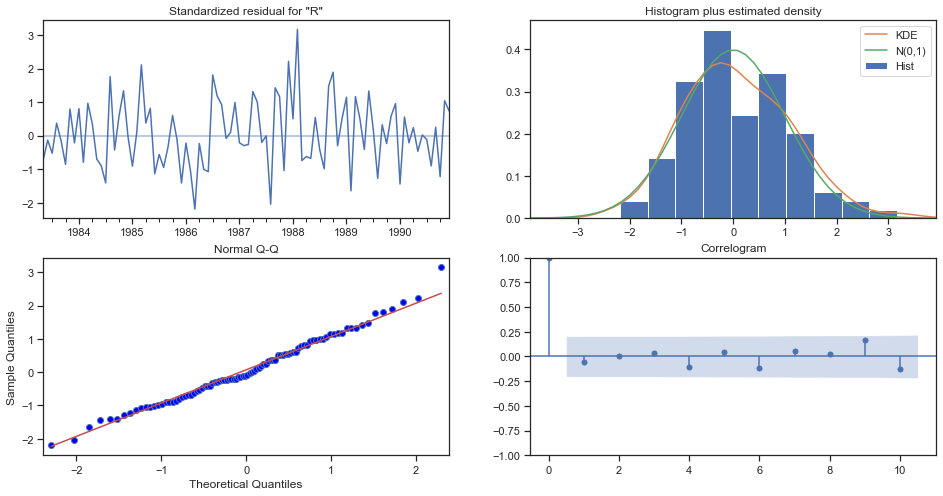

In [141]:
results_SARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

In [142]:
predicted_auto_SARIMA = results_SARIMA.get_forecast(steps=len(test))
predicted_auto_SARIMA1= results_SARIMA.get_prediction(start=pd.to_datetime('1991-01-01'), dynamic=False)

In [143]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,55.237723,13.906996,27.980512,82.494934
1991-02-01,68.121918,13.990463,40.701113,95.542722
1991-03-01,67.909503,14.011516,40.447437,95.371569
1991-04-01,66.786208,14.098816,39.153037,94.419380
1991-05-01,69.761802,14.108175,42.110288,97.413316


In [144]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 18.882179562833826 
MAPE: 36.37693951240223


In [145]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse,'Test MAPE Rose':mape}
                           ,index=['SARIMA(3, 1, 1)*(3, 0, 2, 12)'])


resultsARIMA = pd.concat([resultsARIMA,temp_resultsDf])

resultsARIMA

,Test RMSE,Test MAPE Rose
"ARIMA(2,1,3)",36.813088,75.839726
"ARIMA(2,1,2)",36.871306,76.056960
"SARIMA(3, 1, 1)*(3, 0, 2, 12)",18.882180,36.376940


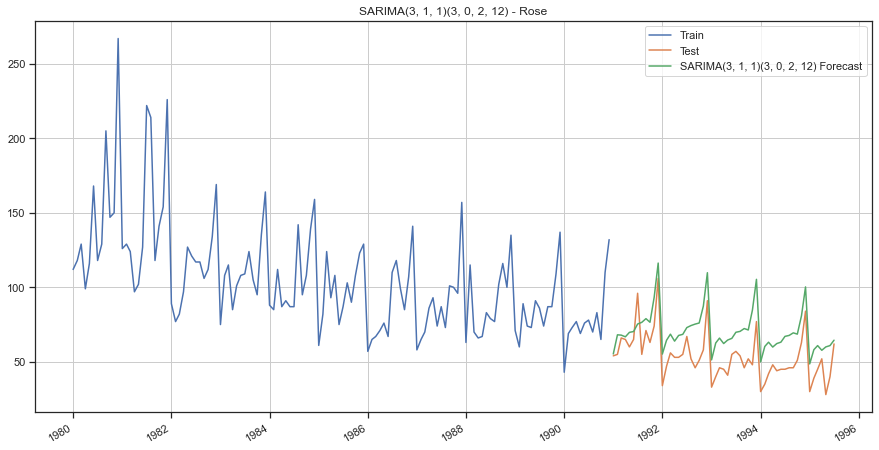

In [146]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA(3, 1, 1)(3, 0, 2, 12) - Rose');

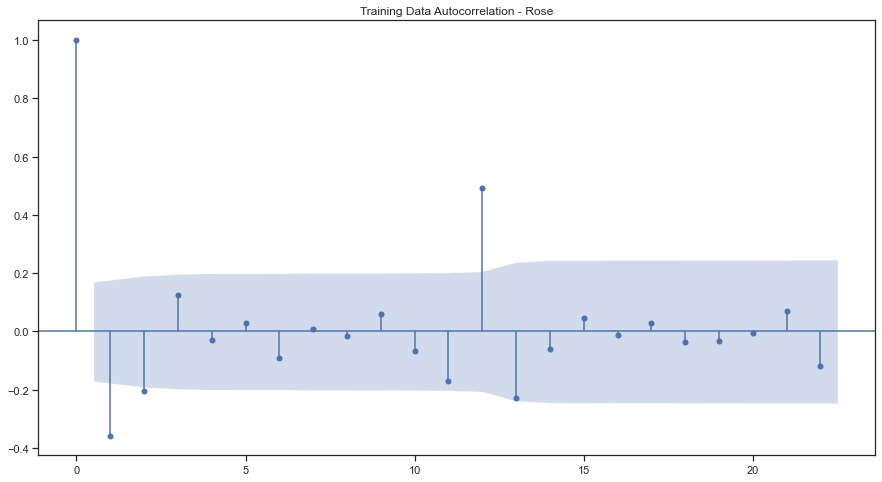

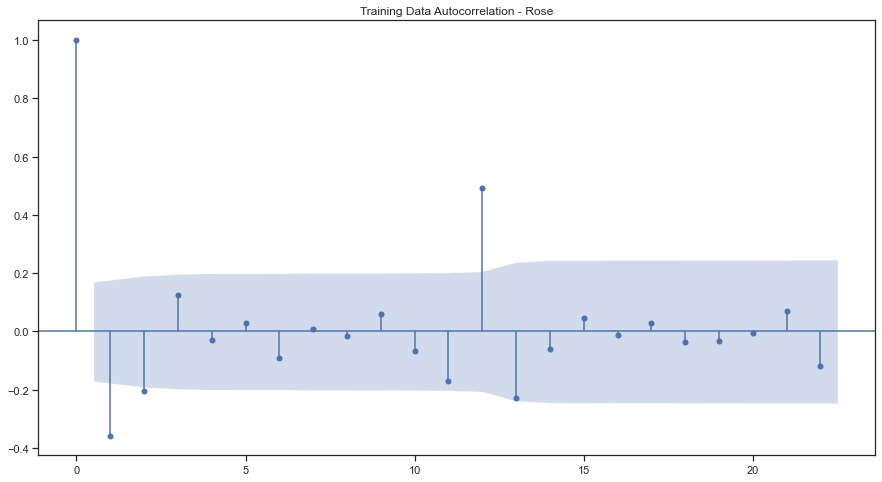

In [147]:
plot_acf(train.diff(),title='Training Data Autocorrelation - Rose',missing='drop')


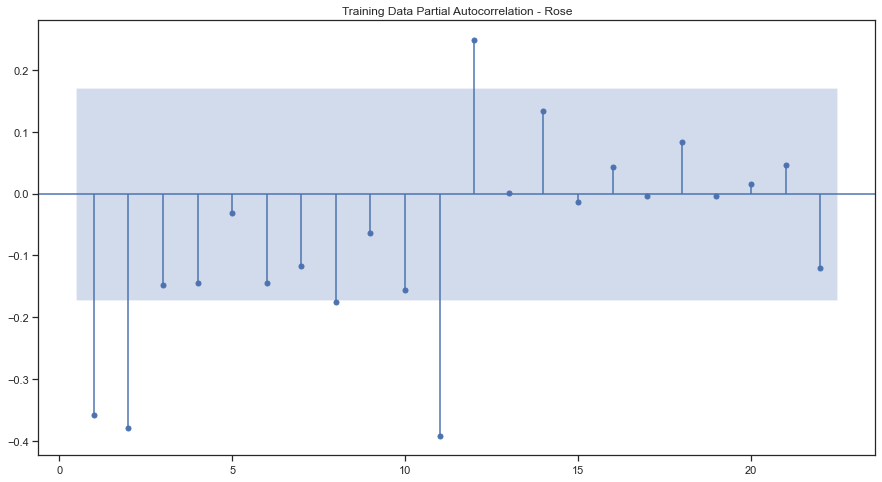

In [148]:
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation - Rose',zero=False,method='ywmle');

In [149]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -379.498
Date:                            Sun, 20 Feb 2022   AIC                            776.996
Time:                                    15:03:51   BIC                            799.692
Sample:                                01-01-1980   HQIC                           786.156
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8551      0.146     -5.838      0.000      -1.142      -0.568
ar.L2         -0.0022      0.125   

In [150]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2,1,2),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -334.893
Date:                            Sun, 20 Feb 2022   AIC                            689.786
Time:                                    15:04:00   BIC                            713.730
Sample:                                01-01-1980   HQIC                           699.392
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7091      0.403      1.758      0.079      -0.081       1.500
ar.L2         -0.1501      0.176   

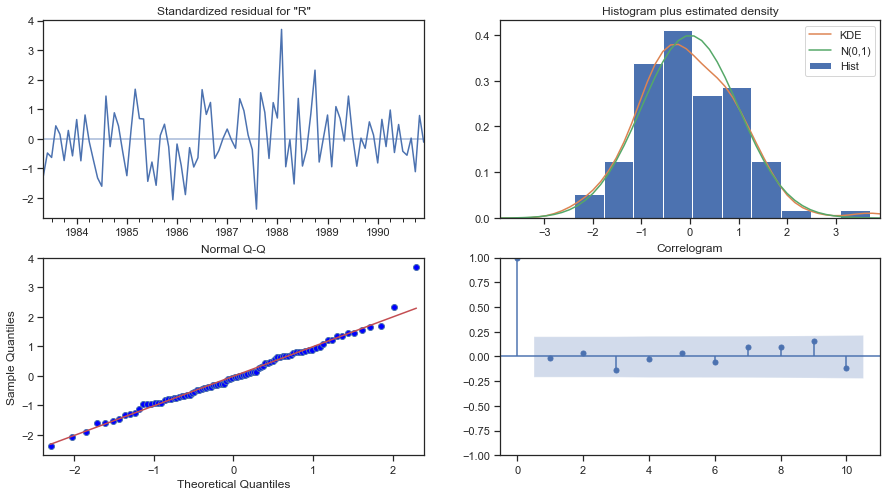

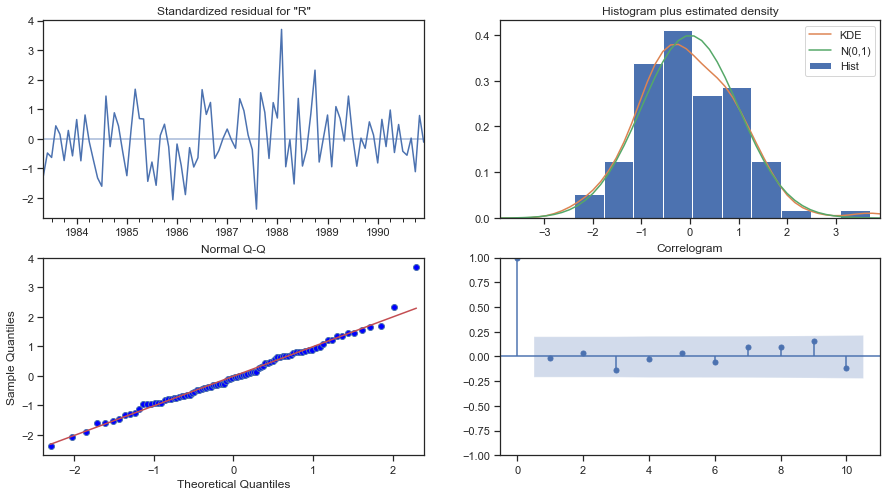

In [151]:
results_manual_SARIMA.plot_diagnostics()


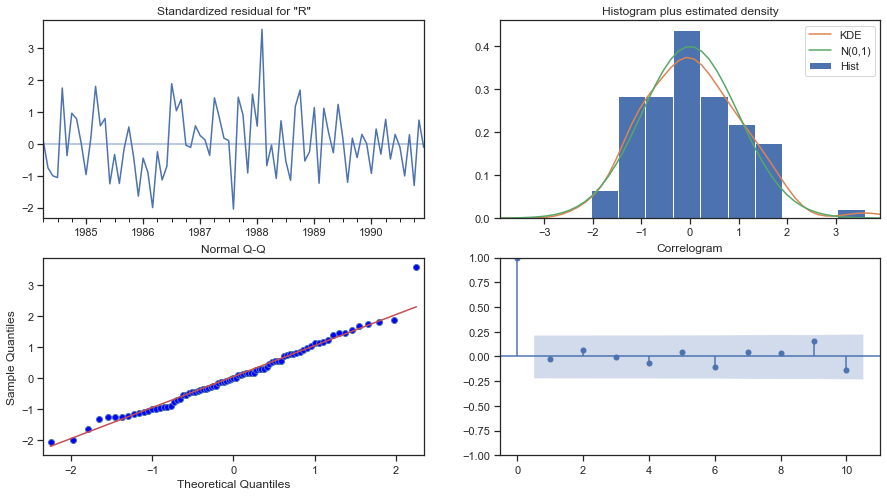

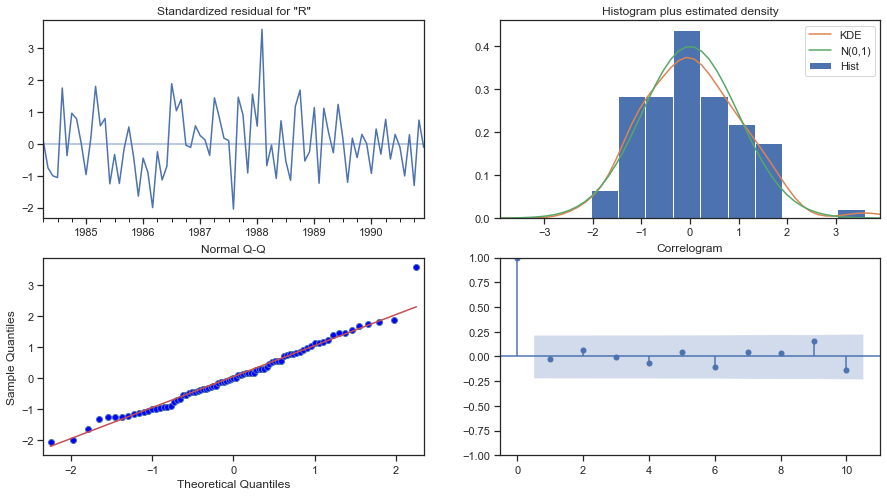

In [152]:
results_manual_SARIMA1.plot_diagnostics()


In [153]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))
                                                             
predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(test))

In [154]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 16.550541254191234 
MAPE: 25.477454044615417


In [155]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA1.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_SARIMA1.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 15.354742517811301 
MAPE: 22.953204345067903


In [156]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE Rose':mape}
                           ,index=['SARIMA(2,1,2)(3,1,2,12)'])


resultsARIMA = pd.concat([resultsARIMA,temp_resultsDf])

resultsARIMA

,Test RMSE,Test MAPE Rose
"ARIMA(2,1,3)",36.813088,75.839726
"ARIMA(2,1,2)",36.871306,76.056960
"SARIMA(3, 1, 1)*(3, 0, 2, 12)",18.882180,36.376940
"SARIMA(2,1,2)(3,1,2,12)",15.354743,22.953204


Text(0.5, 1.0, 'SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE')

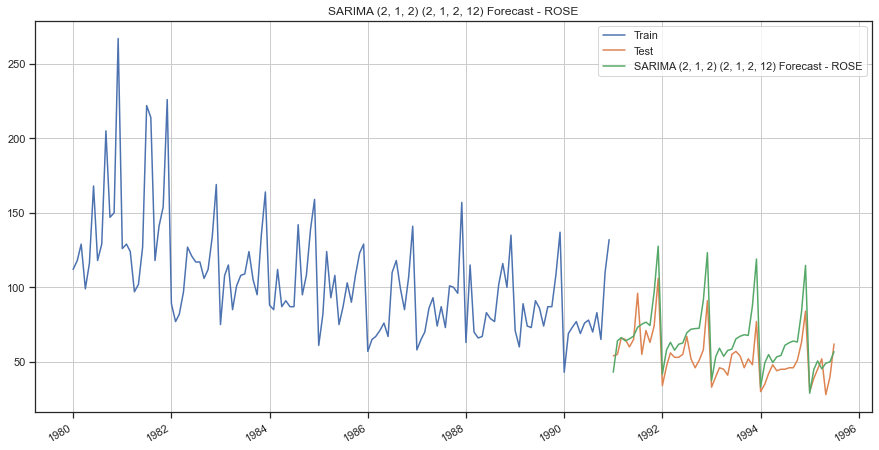

In [157]:
plt.plot(train, label='Train')
plt.plot(test, label ='Test')

predicted_manual_SARIMA.predicted_mean.plot(label = 'SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE')


Text(0.5, 1.0, 'SARIMA (2, 1, 2) (3, 1, 2, 12) Forecast - ROSE')

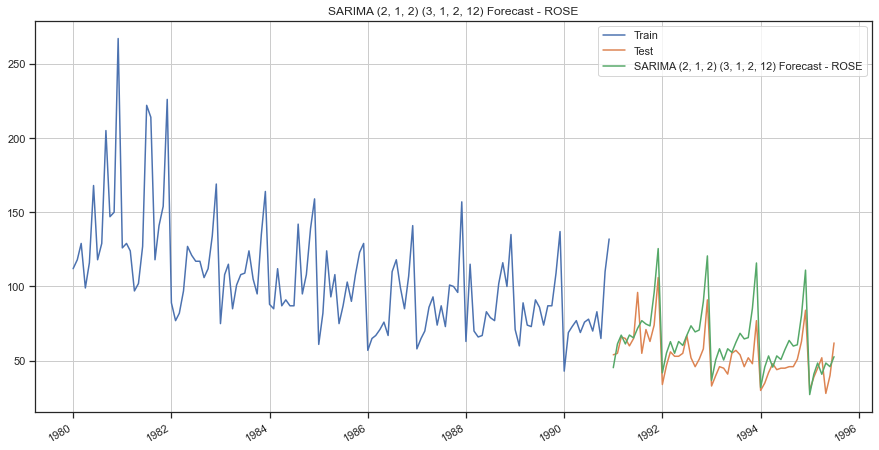

In [158]:
plt.plot(train, label='Train')
plt.plot(test, label ='Test')

predicted_manual_SARIMA1.predicted_mean.plot(label = 'SARIMA (2, 1, 2) (3, 1, 2, 12) Forecast - ROSE')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (2, 1, 2) (3, 1, 2, 12) Forecast - ROSE')


In [159]:
full_data_model = sm.tsa.statespace.SARIMAX(rose_df['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -588.563
Date:                            Sun, 20 Feb 2022   AIC                           1195.125
Time:                                    15:04:05   BIC                           1222.039
Sample:                                01-01-1980   HQIC                          1206.061
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3558      1.935     -0.184      0.854      -4.149       3.437
ar.L2          0.0417      0.197   

In [160]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [161]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,43.617391,12.877762,18.377442,68.857339
1995-09-01,43.689359,13.072762,18.067216,69.311503
1995-10-01,45.504543,13.139196,19.752193,71.256894
1995-11-01,57.584710,13.194534,31.723899,83.445520
1995-12-01,85.000336,13.249764,59.031276,110.969397


In [162]:
rmse = mean_squared_error(rose_df['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 33.04062647677275


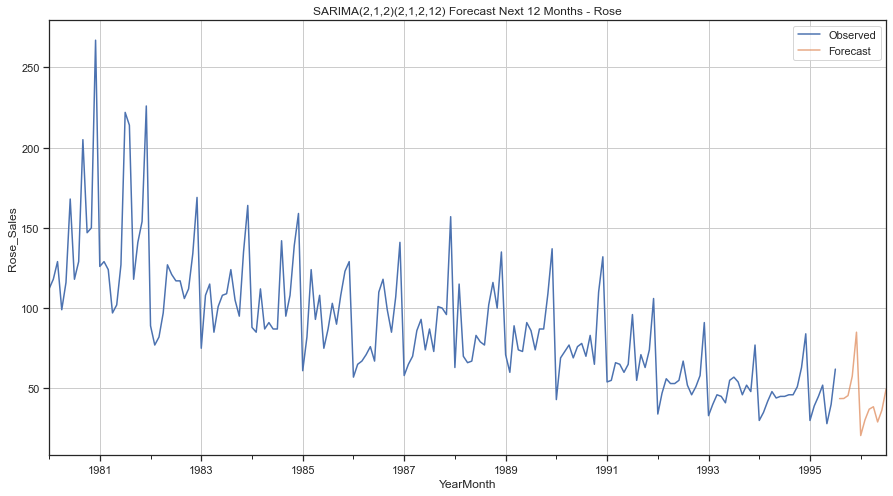

In [163]:
axis = rose_df['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('SARIMA(2,1,2)(2,1,2,12) Forecast Next 12 Months - Rose');

In [164]:
resultsARIMA

,Test RMSE,Test MAPE Rose
"ARIMA(2,1,3)",36.813088,75.839726
"ARIMA(2,1,2)",36.871306,76.056960
"SARIMA(3, 1, 1)*(3, 0, 2, 12)",18.882180,36.376940
"SARIMA(2,1,2)(3,1,2,12)",15.354743,22.953204


In [165]:
results_rose = pd.concat([resultsDf, resultsARIMA['Test RMSE']], axis=0)
results_rose['RMSE']=results_rose['Test RMSE'].fillna(0)+results_rose[0].fillna(0)
results_rose

,Test RMSE,0,RMSE
RegressionOnTime,15.269416,NaN,15.269416
NaiveModel,79.718824,NaN,79.718824
SimpleAverageModel,53.460645,NaN,53.460645
2pointTrailingMovingAverage,11.529409,NaN,11.529409
4pointTrailingMovingAverage,14.450661,NaN,14.450661
6pointTrailingMovingAverage,14.567606,NaN,14.567606
9pointTrailingMovingAverage,14.727902,NaN,14.727902
Simple Exponential Smoothing,53.460645,NaN,53.460645
Double Exponential Smoothing,15.269405,NaN,15.269405
"TripleExponentialSmoothing(A,A)",14.253559,NaN,14.253559


In [166]:
results_rose=results_rose.drop(['Test RMSE',0],axis=1)


In [167]:
results_rose.sort_values(by='RMSE')

,RMSE
2pointTrailingMovingAverage,11.529409
"TripleExponentialSmoothing(A,A)",14.253559
4pointTrailingMovingAverage,14.450661
6pointTrailingMovingAverage,14.567606
9pointTrailingMovingAverage,14.727902
Double Exponential Smoothing,15.269405
RegressionOnTime,15.269416
"SARIMA(2,1,2)(3,1,2,12)",15.354743
"SARIMA(3, 1, 1)*(3, 0, 2, 12)",18.882180
"TripleExponentialSmoothing(A,M)",19.396011


# Forecast next 12 Months Using Optimum Model

Triple Exponential Smoothing with Additive model will be used to pridict next 12 months as the data contains the seasonality

In [168]:
model_TES = ExponentialSmoothing(rose_df,trend='additive',seasonal='additive',initialization_method='estimated')

model_TES_autofit = model_TES.fit()
model_TES_autofit.params

{'smoothing_level': 0.0931115355535814,
 'smoothing_trend': 0.006385040999348874,
 'smoothing_seasonal': 0.0018403354074288626,
 'damping_trend': nan,
 'initial_level': 146.35490537454118,
 'initial_trend': -0.5604905134462271,
 'initial_seasons': array([-27.92485894, -17.19316568,  -9.12999253, -15.68974317,
        -11.70579871,  -5.76734566,   5.49087771,   5.40186552,
          2.67896677,   1.95105934,  17.12534735,  55.8150765 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [169]:
# Forecasting using this model for the duration of the test set
TES_predict_ad_rose =  model_TES_autofit.forecast(steps=12)
TES_predict_ad_rose
prediction_1 = TES_predict_ad_rose

In [170]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(model_TES_autofit.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(model_TES_autofit.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,14.843810,49.680949,84.518087
1995-09-01,11.600056,46.437195,81.274333
1995-10-01,10.348445,45.185584,80.022722
1995-11-01,24.996376,59.833515,94.670653
1995-12-01,63.161878,97.999017,132.836155


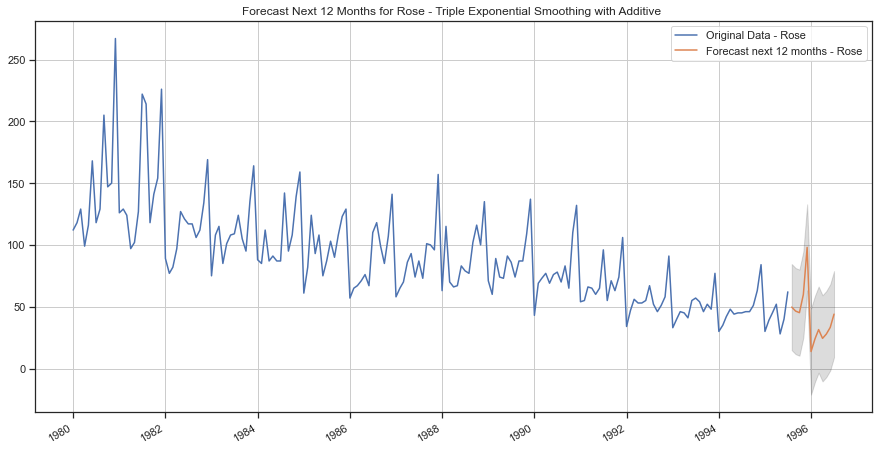

In [171]:
plt.plot(rose_df['Rose'], label='Original Data - Rose')

ax =TES_predict_ad_rose.plot(label='Forecast next 12 months - Rose')


ax.fill_between(pred_1_df.index,pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)

plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Rose - Triple Exponential Smoothing with Additive ');